In [13]:
import mat73
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data_path = "data/downloads/U08_Background.mat"

In [15]:
data_dict = mat73.loadmat(data_path)

In [16]:
data_dict.keys()

dict_keys(['Sig_Mic_bg'])

In [17]:
data_dict['Sig_Mic_bg'].shape

(112, 1443840)

In [18]:
df = pd.DataFrame(data_dict['Sig_Mic_bg'])

In [19]:
df

,0,1,2,3,4,5,6,7,8,9,...,1443830,1443831,1443832,1443833,1443834,1443835,1443836,1443837,1443838,1443839
0,0.052851,0.055908,0.057675,0.051143,0.051495,0.047599,0.040216,0.044000,0.040937,0.039349,...,-0.002262,0.004038,0.007331,0.012285,0.014854,0.010657,0.012957,0.009401,0.001266,0.002940
1,0.044634,0.048781,0.046576,0.041952,0.042514,0.040787,0.042057,0.041566,0.036038,0.038173,...,0.015124,0.009013,0.012511,0.012606,0.005961,0.004077,0.001749,-0.011744,-0.015888,-0.013189
2,0.019449,0.023400,0.025542,0.031055,0.036968,0.037052,0.039269,0.040650,0.035219,0.031417,...,-0.001021,-0.007068,-0.014370,-0.012062,-0.018909,-0.024268,-0.021857,-0.020686,-0.023275,-0.021998
3,0.012293,0.010911,0.011103,0.009547,0.004570,0.006192,0.009663,0.012511,0.016920,0.019623,...,-0.013629,-0.019179,-0.021774,-0.017865,-0.018533,-0.016492,-0.013257,-0.016945,-0.023396,-0.022306
4,0.024495,0.022756,0.023983,0.019590,0.017919,0.019631,0.017534,0.018873,0.015530,0.015039,...,-0.003166,-0.010494,-0.014390,-0.011991,-0.015990,-0.017130,-0.018764,-0.018282,-0.018307,-0.016567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.013667,0.012643,0.008694,0.006353,0.003550,0.001481,0.000303,0.004488,0.010061,0.010911,...,-0.017319,-0.025147,-0.024148,-0.017969,-0.019562,-0.015755,-0.014821,-0.023208,-0.026947,-0.021949
108,0.037017,0.038079,0.042346,0.046313,0.045205,0.044134,0.045819,0.046707,0.045507,0.045350,...,-0.018444,-0.018198,-0.015116,-0.016592,-0.015500,-0.013519,-0.011488,-0.011803,-0.013191,-0.016426
109,0.047156,0.044641,0.043835,0.037847,0.034462,0.031169,0.026485,0.026925,0.024346,0.022261,...,-0.009412,-0.007359,-0.005728,-0.012261,-0.014478,-0.015731,-0.025692,-0.028593,-0.018879,-0.027067
110,0.044810,0.043809,0.050300,0.049768,0.050388,0.053417,0.056885,0.058032,0.058532,0.058918,...,-0.002737,0.001133,0.000250,-0.009277,-0.009871,-0.013800,-0.023145,-0.020583,-0.019521,-0.018512


In [20]:
sample_rate = 48128

# Reduce number of points to plot in heatmap
df_compact = df.iloc[::1,::int(sample_rate/3)]

# Swap sample number for time in seconds
df_compact.columns = df_compact.columns/sample_rate

# Get mean of each col df using pd.concat.
df_mean = pd.concat([df.mean(axis=0)], axis=1)
df_mean.columns = ['mean']
df_mean.index = df_mean.index/sample_rate
df_mean

,mean
0.000000,0.039952
0.000021,0.040300
0.000042,0.040340
0.000062,0.040466
0.000083,0.040448
...,...
29.999896,-0.010771
29.999917,-0.010760
29.999938,-0.011053
29.999958,-0.011235


<AxesSubplot:>

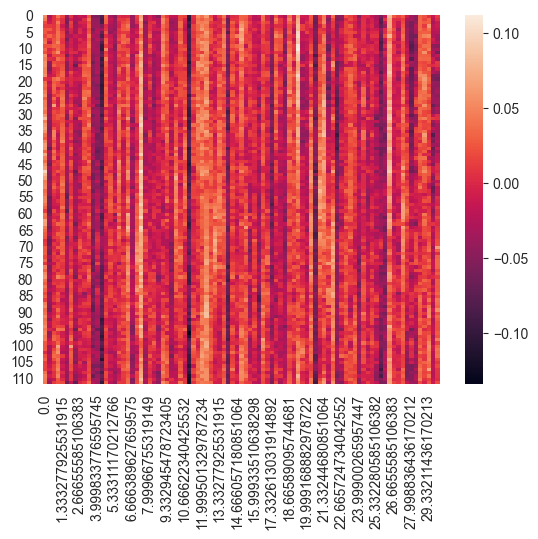

In [21]:
sns.heatmap(df_compact)

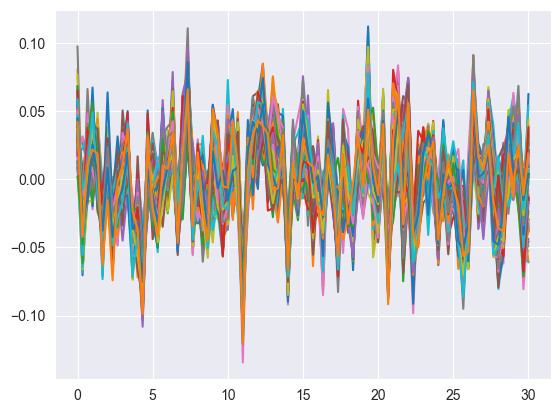

In [22]:
plot_rows = 112 # Each row corresponds to a microphone

for i in range(plot_rows):
    df_ = df_compact.iloc[i,:]
    sns.lineplot(data=df_,
                 x=df_.index,
                 y=df_.values)

Text(0.5, 1.0, 'Mean microphone signal')

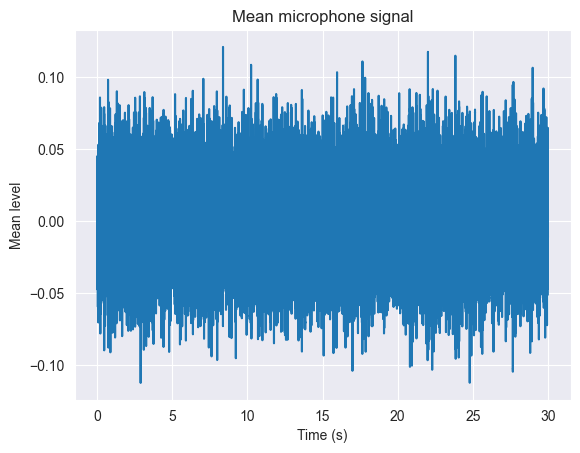

In [23]:
# Plot the mean microphone signal
# df has 1 col (mean level), index is time in seconds
sns.lineplot(data=df_mean,
             x=df_mean.index,
             y=df_mean["mean"])

plt.xlabel("Time (s)")
plt.ylabel("Mean level")
plt.title("Mean microphone signal")


Dominant frequency: 22.00 Hz


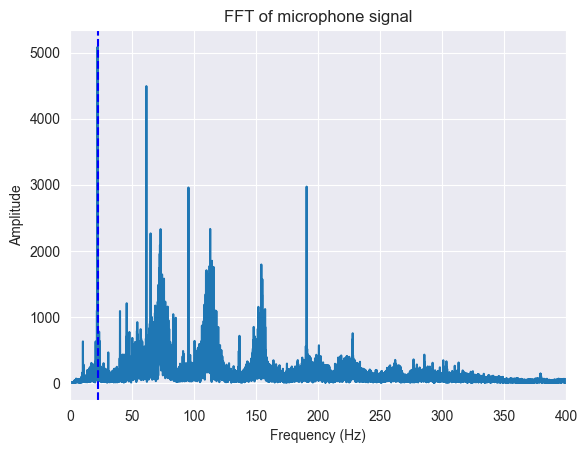

In [24]:
# Convert the dataframe to a numpy array
signal = df_mean["mean"].values

# Calculate the FFT of the signal with numpy
signal_fft = np.fft.fft(signal)

# Calculate the frequency axis
freq = np.fft.fftfreq(signal.size, d=1/sample_rate)

# Plot the FFT
sns.lineplot(x=freq, y=np.abs(signal_fft))
plt.xlim(0, 400)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT of microphone signal")

# Calculate the dominant frequency
dom_freq = freq[np.argmax(np.abs(signal_fft))]
print(f"Dominant frequency: {dom_freq:.2f} Hz")

# Plot the dominant frequency
plt.axvline(dom_freq, color='b', linestyle='--')

Text(0.5, 1.0, 'A-weighted FFT of microphone signal')

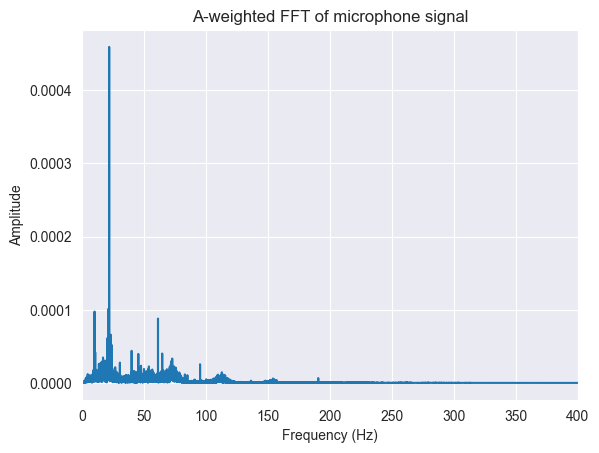